In [1]:
import pandas as pd

# Load CSV file into a DataFrame
data_1 = pd.read_csv('Customer-Churn-Records.csv')

# Drop columns and update the DataFrame in place
data_1.drop(columns=['RowNumber', 'Surname', 'Gender', 'Geography'], inplace=True)
data_1

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


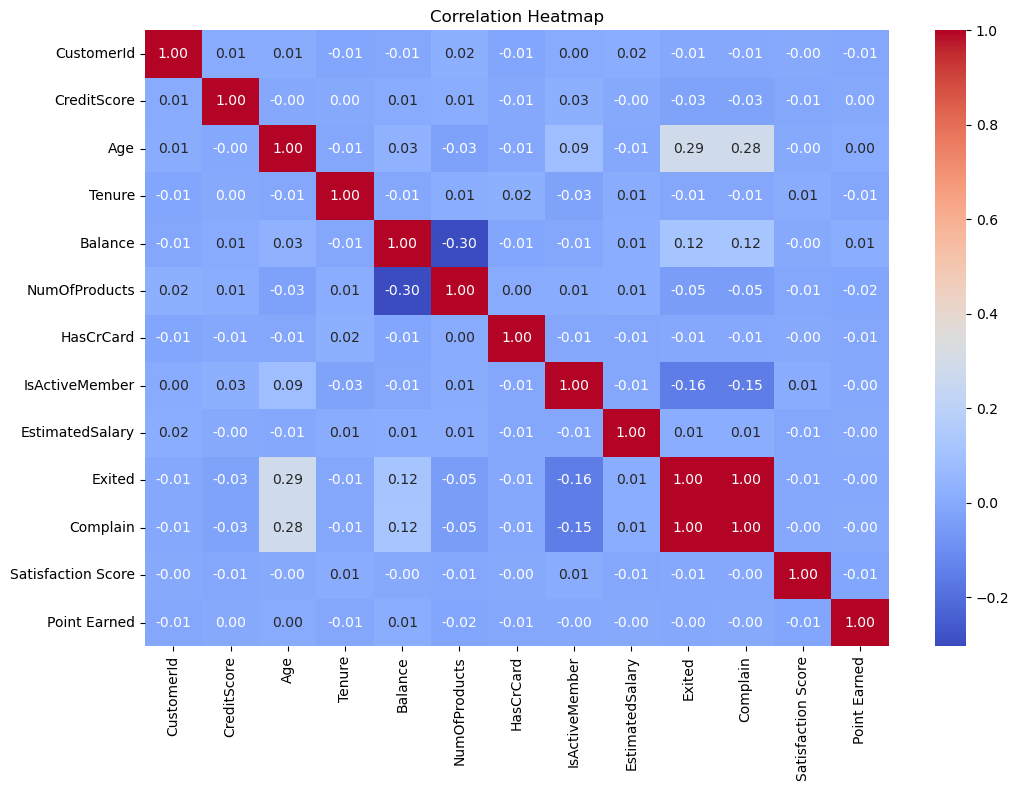

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation heatmap
numeric_data = data_1.select_dtypes(include=['int64', 'float64']).columns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_1[numeric_data].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
# Copy data for clustering
data_2 = data_1.copy()

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Select relevant features
features = data_2[['CreditScore', 'Age', 'EstimatedSalary', 'Exited', 'Complain', 'Point Earned']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Experiment with different numbers of clusters
for n_clusters in range(2, 5):
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    db_index = davies_bouldin_score(features_scaled, cluster_labels)
    print(f"Number of clusters: {n_clusters}, the silhouette score: {silhouette_avg:.2f}, Davies-Bouldin index: {db_index:.2f}")

Number of clusters: 2, the silhouette score: 0.42, Davies-Bouldin index: 1.06
Number of clusters: 3, the silhouette score: 0.24, Davies-Bouldin index: 1.61
Number of clusters: 4, the silhouette score: 0.24, Davies-Bouldin index: 1.45


**Scihouette score**, this metric measures the quality of clustering by calculating the mean intra-cluster distance - how close each point in one cluster is to points in the same cluster, and the mean nearest cluster distance - how close each point is to points in the next nearest cluster. The score ranges from -1 to 1, where a high value indicates that clusters are well-separated and internally cohesive.

**Davies-Bouldin index**, this index evaluates clustering quality by comparing the ratio of within-cluster distances to between-cluster distances. Lower values of this index indicate better clustering, as they suggest lower intra-cluster variance and higher separation between cluster.

In [8]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
data_2['class'] = kmeans.fit_predict(features_scaled)

#1. Sum where 'class' == 0
sum_class_0 = (data_2['class'] == 0).sum()
#2. Sum where 'class' == 0 and 'Complain' == 1
sum_class_0_complain_1 = data_2[(data_2['class'] == 0) & (data_2['Complain'] == 1)].shape[0]
#3. Sum where 'class' == 0 and 'Exited' == 1
sum_class_0_exited_1 = data_2[(data_2['class'] == 0) & (data_2['Exited'] == 1)].shape[0]
#4. Sum where 'class' == 1 and 'Complain' == 1
sum_class_1_complain_1 = data_2[(data_2['class'] == 1) & (data_2['Complain'] == 1)].shape[0]
#5. Sum where 'class' == 1 and 'Exited' == 1
sum_class_1_exited_1 = data_2[(data_2['class'] == 1) & (data_2['Exited'] == 1)].shape[0]

# Print the results
print(f"Sum where 'class' == 0: {sum_class_0}")
print(f"Sum where 'class' == 0 and 'Complain' == 1: {sum_class_0_complain_1}")
print(f"Sum where 'class' == 0 and 'Exited' == 1: {sum_class_0_exited_1}")
print(f"Sum where 'class' == 1 and 'Complain' == 1: {sum_class_1_complain_1}")
print(f"Sum where 'class' == 1 and 'Exited' == 1: {sum_class_1_exited_1}")

Sum where 'class' == 0: 7962
Sum where 'class' == 0 and 'Complain' == 1: 8
Sum where 'class' == 0 and 'Exited' == 1: 2
Sum where 'class' == 1 and 'Complain' == 1: 2036
Sum where 'class' == 1 and 'Exited' == 1: 2036
